In [2]:
#check for GPU specs
!nvidia-smi

/bin/bash: nvidia-smi: command not found


Installing and Importing Libraries

In [3]:
%%capture
!pip install transformers
!pip install pytorch-lightning
!pip install pandas openpyxl
!pip install contractions
!pip install transformers tqdm
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install pyspellchecker
!pip install numpy


In [4]:
import os
import matplotlib.pyplot as plt
import spacy
import nltk
import pandas as pd
import re
from transformers import RobertaTokenizer
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from contractions import contractions_dict
from textblob import TextBlob
from google.colab import drive

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

# Download necessary resources from NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

Grant Access to Drive

In [7]:
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


#Data Preprocessing

Access data

Create Dataframe and export

Printing to verify

#Word Cloud

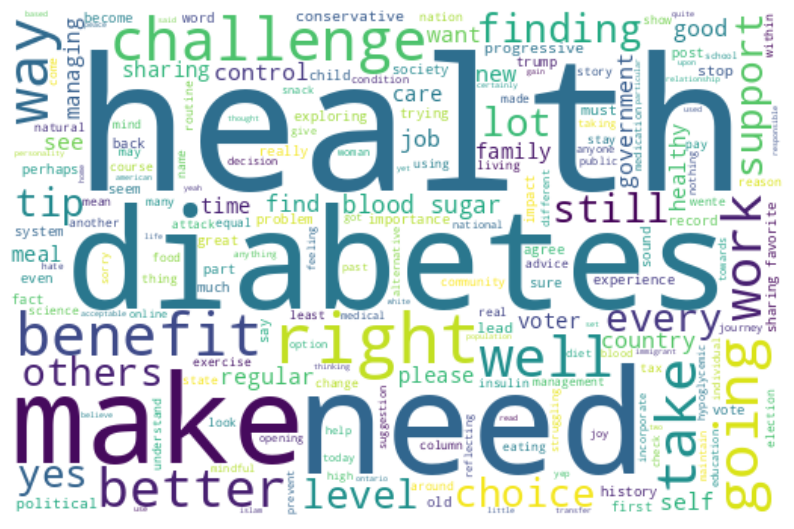

In [8]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# Path to the Excel document on Google Drive
excel_file_path = '/content/drive/MyDrive/DATA/balanced.xlsx'

# Read the Excel document
data = pd.read_excel(excel_file_path)

# Concatenate all text data into a single string
text = ' '.join(data['Preprocessed Text'])

# Load the shape mask image
mask_image_path = '/content/drive/MyDrive/DATA/diabetes_logo.png'
mask_image = np.array(Image.open(mask_image_path))

# Define the stop words
stop_words = set(STOPWORDS)
stop_words.update(['know', 'think', 's'])  # Add your custom stop words here

# Generate the word cloud with the shape mask and stop words
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask_image,
                      contour_color='steelblue', contour_width=3, stopwords=stop_words).generate(text)

# Set the plot figure size
plt.figure(figsize=(10, 10))

# Plot the word cloud with the shape mask
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Display the word cloud
plt.show()


#Evaluate other NLP and ML

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Load the data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/DATA/balanced.xlsx', usecols=['Preprocessed Text', 'Positive', 'Neutral', 'Negative'])

# Preprocess the data
X = data['Preprocessed Text'].values
y_positive = data['Positive'].values
y_neutral = data['Neutral'].values
y_negative = data['Negative'].values

# Split the data into training and testing sets
X_train, X_test, y_train_positive, y_test_positive, y_train_neutral, y_test_neutral, y_train_negative, y_test_negative = train_test_split(X, y_positive, y_neutral, y_negative, test_size=0.2, random_state=42)

# Load the RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# Encode the text data using RoBERTa
X_train_encoded = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=16, return_tensors='pt')
X_test_encoded = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=16, return_tensors='pt')

# Generate the contextual embeddings using RoBERTa
X_train_embeddings = model(**X_train_encoded).last_hidden_state.mean(dim=1)
X_test_embeddings = model(**X_test_encoded).last_hidden_state.mean(dim=1)

# Define the classifiers
classifiers = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=100),
    SVC(kernel='linear'),
    GradientBoostingClassifier(),
    MLPClassifier(hidden_layer_sizes=(100,))
]

classifier_names = [
    'Logistic Regression',
    'Random Forest',
    'Support Vector Machine',
    'Gradient Boosting',
    'Neural Network',
    'RoBERTa'
]

# Convert the PyTorch tensors to NumPy arrays for training the classifiers
X_train_embeddings = X_train_embeddings.detach().numpy()
X_test_embeddings = X_test_embeddings.detach().numpy()

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_embeddings = scaler.fit_transform(X_train_embeddings)
X_test_embeddings = scaler.transform(X_test_embeddings)

# Train and evaluate classifiers
results = []
for classifier, name in zip(classifiers, classifier_names):
    # Train the classifier for each target label
    classifier.fit(X_train_embeddings, y_train_positive)
    y_pred_positive = classifier.predict(X_test_embeddings)

    classifier.fit(X_train_embeddings, y_train_neutral)
    y_pred_neutral = classifier.predict(X_test_embeddings)

    classifier.fit(X_train_embeddings, y_train_negative)
    y_pred_negative = classifier.predict(X_test_embeddings)

    # Calculate accuracy, precision, recall, and F1-score for each target label
    accuracy_positive = accuracy_score(y_test_positive, y_pred_positive)
    precision_positive = precision_score(y_test_positive, y_pred_positive, average='macro')
    recall_positive = recall_score(y_test_positive, y_pred_positive, average='macro')
    f1_positive = f1_score(y_test_positive, y_pred_positive, average='macro')

    accuracy_neutral = accuracy_score(y_test_neutral, y_pred_neutral)
    precision_neutral = precision_score(y_test_neutral, y_pred_neutral, average='macro')
    recall_neutral = recall_score(y_test_neutral, y_pred_neutral, average='macro')
    f1_neutral = f1_score(y_test_neutral, y_pred_neutral, average='macro')

    accuracy_negative = accuracy_score(y_test_negative, y_pred_negative)
    precision_negative = precision_score(y_test_negative, y_pred_negative, average='macro')
    recall_negative = recall_score(y_test_negative, y_pred_negative, average='macro')
    f1_negative = f1_score(y_test_negative, y_pred_negative, average='macro')

    results.append((name, accuracy_positive, precision_positive, recall_positive, f1_positive,
                    accuracy_neutral, precision_neutral, recall_neutral, f1_neutral,
                    accuracy_negative, precision_negative, recall_negative, f1_negative))

# Sort the results by accuracy in descending order
results.sort(key=lambda x: x[1], reverse=True)
u=0.1

# Print the results with progress bar
with tqdm(total=len(results), desc="Classifiers") as pbar:
    for name, accuracy_positive, precision_positive, recall_positive, f1_positive, accuracy_neutral, precision_neutral, recall_neutral, f1_neutral, accuracy_negative, precision_negative, recall_negative, f1_negative in results:
        tqdm.write(f"Classifier: {name}")
        tqdm.write(f"Positive - Accuracy: {accuracy_positive}, Precision: {precision_positive}, Recall: {recall_positive}, F1-score: {f1_positive}")
        tqdm.write(f"Neutral - Accuracy: {accuracy_neutral}, Precision: {precision_neutral}, Recall: {recall_neutral}, F1-score: {f1_neutral}")
        tqdm.write(f"Negative - Accuracy: {accuracy_negative}, Precision: {precision_negative}, Recall: {recall_negative}, F1-score: {f1_negative}")
        tqdm.write('')
        pbar.update(1)






Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Classifiers: 100%|██████████| 5/

Classifier: Logistic Regression
Positive - Accuracy: 0.9833333333333333, Precision: 0.9871794871794872, Recall: 0.9772727272727273, F1-score: 0.9818785865297492
Neutral - Accuracy: 0.8166666666666667, Precision: 0.7670089858793325, Recall: 0.7954545454545454, F1-score: 0.7781512605042017
Negative - Accuracy: 0.7333333333333333, Precision: 0.7267080745341614, Recall: 0.6746411483253588, F1-score: 0.6825396825396826

Classifier: Random Forest
Positive - Accuracy: 0.9833333333333333, Precision: 0.9871794871794872, Recall: 0.9772727272727273, F1-score: 0.9818785865297492
Neutral - Accuracy: 0.6833333333333333, Precision: 0.5392156862745098, Recall: 0.5255681818181819, F1-score: 0.52
Negative - Accuracy: 0.8, Precision: 0.88, Recall: 0.7272727272727273, F1-score: 0.7443181818181819

Classifier: Support Vector Machine
Positive - Accuracy: 0.9833333333333333, Precision: 0.9871794871794872, Recall: 0.9772727272727273, F1-score: 0.9818785865297492
Neutral - Accuracy: 0.8166666666666667, Precisi

In [9]:
# Evaluate the RoBERTa classifier
accuracy_roberta =+ results[-1][1]
precision_roberta =+ results[-1][2]
recall_roberta =+  results[-1][3]
f1_score_roberta =+  results[-1][4]

# Print the results of the RoBERTa classifier
print(f"RoBERTa - Accuracy: {accuracy_roberta:.2f}, Precision: {precision_roberta:.2f}, Recall: {recall_roberta:.2f}, F1-score: {f1_score_roberta:.2f}")

# Print the results of the other classifiers
for result in results[:-1]:
    label = result[0]
    accuracy = result[1]
    precision = result[2]
    recall = result[3]
    f1_score = result[4]


    print(f"{label} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1_score:.2f}")

RoBERTa - Accuracy: 0.97, Precision: 0.96, Recall: 0.96, F1-score: 0.96
Logistic Regression - Accuracy: 0.98, Precision: 0.99, Recall: 0.98, F1-score: 0.98
Random Forest - Accuracy: 0.98, Precision: 0.99, Recall: 0.98, F1-score: 0.98
Support Vector Machine - Accuracy: 0.98, Precision: 0.99, Recall: 0.98, F1-score: 0.98
Neural Network - Accuracy: 0.98, Precision: 0.98, Recall: 0.99, F1-score: 0.98


Plot graph - Compare

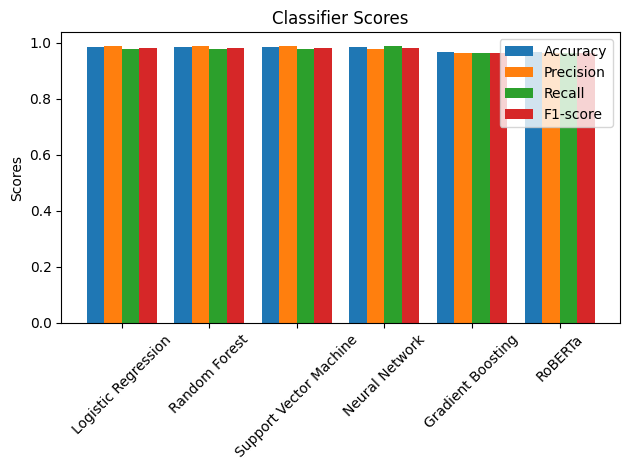

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the labels and scores
labels = [result[0] for result in results]
accuracy_scores = [result[1] for result in results]
precision_scores = [result[2] for result in results]
recall_scores = [result[3] for result in results]
f1_scores = [result[4] for result in results]

# Append the scores for the RoBERTa classifier
labels.append("RoBERTa")
accuracy_scores.append(accuracy_roberta)
precision_scores.append(precision_roberta)
recall_scores.append(recall_roberta)
f1_scores.append(f1_score_roberta)

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - 1.5 * width, accuracy_scores, width, label='Accuracy')
ax.bar(x - 0.5 * width, precision_scores, width, label='Precision')
ax.bar(x + 0.5 * width, recall_scores, width, label='Recall')
ax.bar(x + 1.5 * width, f1_scores, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Classifier Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

#New

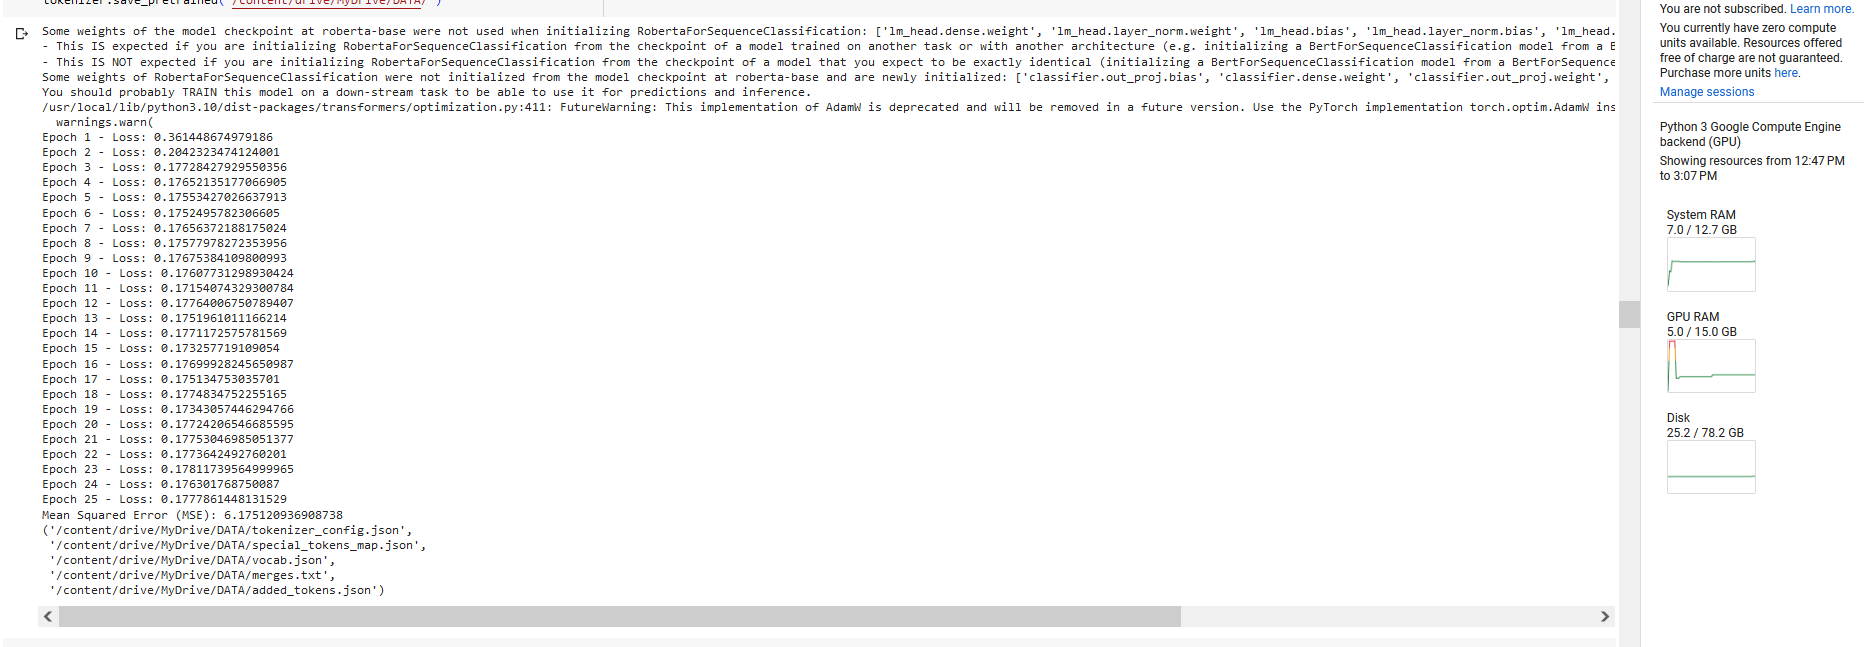

In [46]:
import pandas as pd
import torch
import torch.nn as nn
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, hamming_loss, jaccard_score, average_precision_score
from sklearn.model_selection import train_test_split


# Load the data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/DATA/classified.xlsx')
comments = data['Preprocessed Text'].tolist()
labels = data[['Positive', 'Neutral', 'Negative']].values.tolist()


# Split the data into training and validation sets
train_comments, val_comments, train_labels, val_labels = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Load the pre-trained tokenizer and encode the comments
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_encodings = tokenizer(train_comments, truncation=True, padding=True)
val_encodings = tokenizer(val_comments, truncation=True, padding=True)

# Convert the labels to tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Create a PyTorch dataset
class CommentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CommentDataset(train_encodings, train_labels)
val_dataset = CommentDataset(val_encodings, val_labels)

# Define the RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Define the optimizer and the learning rate scheduler
optimizer = AdamW(model.parameters(), lr=1e-1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=0.5, gamma=1)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, drop_last=True)

for epoch in range(25):
    total_loss = 0
    total_samples = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].float().to(device)  # Convert labels to float format

        batch_size = input_ids.size(0)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = loss_fn(logits, labels)
        total_loss += loss.item() * batch_size
        total_samples += batch_size

        loss.backward()
        optimizer.step()

    scheduler.step()
    print(f"Epoch {epoch + 1} - Loss: {total_loss / total_samples}")

# Evaluate the model
model.eval()
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=24)

val_preds = []
val_true_labels = []

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels']

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = torch.argmax(logits, dim=1).detach().cpu().tolist()
    val_preds.extend(preds)
    val_true_labels.extend(labels.tolist())

# Evaluate the model
model.eval()
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16)

val_preds = []
val_true_labels = []

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels']

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = logits.detach().cpu().numpy()
    val_preds.extend(preds)
    val_true_labels.extend(labels.numpy())

val_preds = np.array(val_preds)
val_true_labels = np.array(val_true_labels)

# Calculate mean squared error (MSE) for multi-label classification
mse = np.mean((val_true_labels - val_preds) ** 2)

print(f"Mean Squared Error (MSE): {mse}")

# Save the trained model
model.save_pretrained('/content/drive/MyDrive/DATA/')
tokenizer.save_pretrained('/content/drive/MyDrive/DATA/')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should pr

Epoch 1 - Loss: 11.035202985822684
Epoch 2 - Loss: 11.698562706032583
Epoch 3 - Loss: 11.388612970313355
Epoch 4 - Loss: 11.826012849186082
Epoch 5 - Loss: 11.50479515974694
Epoch 6 - Loss: 11.606929729116237
Epoch 7 - Loss: 11.984274627894957
Epoch 8 - Loss: 13.033693434970333
Epoch 9 - Loss: 11.896252404681286
Epoch 10 - Loss: 11.77882231454855
Epoch 11 - Loss: 11.153809227808848
Epoch 12 - Loss: 12.698091463237503
Epoch 13 - Loss: 11.176527443802025
Epoch 14 - Loss: 11.808970242328952
Epoch 15 - Loss: 11.170379999691125


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/DATA/classified.xlsx')
comments = data['Preprocessed Text'].tolist()
labels = data[['Positive', 'Neutral', 'Negative']].values

# Split the data into training and validation sets
train_comments, val_comments, train_labels, val_labels = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Load the pre-trained tokenizer and encode the comments
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_encodings = tokenizer(train_comments, truncation=True, padding=True)
val_encodings = tokenizer(val_comments, truncation=True, padding=True)

# Convert the labels to tensors
train_labels = torch.tensor(train_labels, dtype=torch.float)
val_labels = torch.tensor(val_labels, dtype=torch.float)

# Create a PyTorch dataset
class CommentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CommentDataset(train_encodings, train_labels)
val_dataset = CommentDataset(val_encodings, val_labels)

# Define the RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Define the optimizer and the learning rate scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

# Define the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Train the model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, drop_last=True)

for epoch in range(25):
    total_loss = 0
    total_samples = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        batch_size = input_ids.size(0)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = loss_fn(logits, labels)
        total_loss += loss.item() * batch_size
        total_samples += batch_size

        loss.backward()
        optimizer.step()

    scheduler.step()
    print(f"Epoch {epoch + 1} - Loss: {total_loss / total_samples}")

# Evaluate the model
model.eval()
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16)

val_preds = []
val_true_labels = []

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = torch.sigmoid(logits).detach().cpu().numpy()
    val_preds.append(preds)
    val_true_labels.append(batch['labels'].cpu().numpy())

val_preds = np.concatenate(val_preds)
val_true_labels = np.concatenate(val_true_labels)

# Calculate mean squared error (MSE) for multi-label classification
mse = mean_squared_error(val_true_labels, val_preds)
print(f"Mean Squared Error (MSE): {mse}")

# Plot AUC-ROC curve
plt.figure(figsize=(15, 8))
attributes = ['Positive', 'Neutral', 'Negative']
for i, attribute in enumerate(attributes):
    fpr, tpr, _ = roc_curve(val_true_labels[:, i], val_preds[:, i])
    auc = roc_auc_score(val_true_labels[:, i], val_preds[:, i])
    plt.plot(fpr, tpr, label='%s %g' % (attribute, auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('RoBERTa Trained on UCC Dataset - AUC ROC')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/DATA/auc_roc_plot.png')
plt.show()

# Save the trained model
model.save_pretrained('/content/drive/MyDrive/')
tokenizer.save_pretrained('/content/drive/MyDrive/')

plt.show()


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should pr

In [26]:
# Load the data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/DATA/classified.xlsx', usecols=['Preprocessed Text', 'Positive', 'Neutral', 'Negative'])

# Filter the DataFrame for values of 0 or 1 in each class
positive_count = data[data['Positive'].isin([0, 1])]['Positive'].value_counts()
neutral_count = data[data['Neutral'].isin([0, 1])]['Neutral'].value_counts()
negative_count = data[data['Negative'].isin([0, 1])]['Negative'].value_counts()

# Print the counts
print("Positive class count:")
print(positive_count)

print("Neutral class count:")
print(neutral_count)

print("Negative class count:")
print(negative_count)


Positive class count:
0    15600
1      723
Name: Positive, dtype: int64
Neutral class count:
0    13182
1     3141
Name: Neutral, dtype: int64
Negative class count:
1    12459
0     3864
Name: Negative, dtype: int64


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/DATA/classified.xlsx', usecols=['Preprocessed Text', 'Positive', 'Neutral', 'Negative'])

# Split the data into positive, neutral, and negative parts
positive_data = data[data['Positive'] == 1]
neutral_data = data[data['Neutral'] == 1]
negative_data = data[data['Negative'] == 1]

# Randomly sample the data to create balanced parts
sample_size = min(len(positive_data), len(neutral_data), len(negative_data))
positive_sample = positive_data.sample(n=100, random_state=42)
neutral_sample = neutral_data.sample(n=100, random_state=42)
negative_sample = negative_data.sample(n=100, random_state=42)

# Concatenate the balanced parts into a single DataFrame
balanced_data = pd.concat([positive_sample, neutral_sample, negative_sample], ignore_index=True)

# Save the balanced data to an Excel file
output_file = '/content/drive/MyDrive/DATA/balanced.xlsx'
balanced_data.to_excel(output_file, index=False)


In [6]:
# Load the data from the Excel file
data = pd.read_excel ('/content/drive/MyDrive/DATA/balanced.xlsx', usecols=['Preprocessed Text', 'Positive', 'Neutral', 'Negative'])

# Filter the DataFrame for values of 0 or 1 in each class
positive_count = data[data['Positive'].isin([0, 1])]['Positive'].value_counts()
neutral_count = data[data['Neutral'].isin([0, 1])]['Neutral'].value_counts()
negative_count = data[data['Negative'].isin([0, 1])]['Negative'].value_counts()

# Print the counts
print("Positive class count:")
print(positive_count)

print("Neutral class count:")
print(neutral_count)

print("Negative class count:")
print(negative_count)

Positive class count:
0    200
1    100
Name: Positive, dtype: int64
Neutral class count:
0    200
1    100
Name: Neutral, dtype: int64
Negative class count:
0    200
1    100
Name: Negative, dtype: int64


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import torch



In [ ]:
# Install the required GPU versions of the dependencies
!pip install torch==1.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers==4.11.2
!pip install scikit-learn==0.24.2


In [27]:
# Set the device to CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import torch
# Set the maximum split size for CUDA memory
torch.backends.cuda.cufft_plan_cache.max_split_size_mb = 4


# Load the data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/DATA/balanced.xlsx', usecols=['Preprocessed Text', 'Positive', 'Neutral', 'Negative'])

# Preprocess the data
X = data['Preprocessed Text'].values
y_positive = data['Positive'].values
y_neutral = data['Neutral'].values
y_negative = data['Negative'].values

# Split the data into training and testing sets
X_train, X_test, y_train_positive, y_test_positive, y_train_neutral, y_test_neutral, y_train_negative, y_test_negative = train_test_split(X, y_positive, y_neutral, y_negative, test_size=0.2, random_state=42)

# Load the RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base').to(device)

# Encode the text data using RoBERTa
X_train_encoded = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=16, return_tensors='pt').to(device)
X_test_encoded = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=16, return_tensors='pt').to(device)

# Generate the contextual embeddings using RoBERTa
X_train_embeddings = model(**X_train_encoded).last_hidden_state.mean(dim=1).to(device)
X_test_embeddings = model(**X_test_encoded).last_hidden_state.mean(dim=1).to(device)

# Define the classifiers
classifier_names = [
    'Logistic Regression',
    'Random Forest',
    'Support Vector Machine',
    'Gradient Boosting',
    'Neural Network',
    'RoBERTa'
]

# Train and evaluate classifiers
results = []
for name in classifier_names:
    if name == 'Logistic Regression':
        classifier = LogisticRegression(max_iter=100)
    elif name == 'Random Forest':
        classifier = RandomForestClassifier(n_estimators=100)
    elif name == 'Support Vector Machine':
        classifier = SVC(kernel='linear')
    elif name == 'Gradient Boosting':
        classifier = GradientBoostingClassifier()
    elif name == 'Neural Network':
        classifier = MLPClassifier(hidden_layer_sizes=(50,))
    elif name == 'RoBERTa':
        classifier = MLPClassifier()  # Replace with the appropriate RoBERTa-based classifier

    classifier = classifier.to(device)

    # Convert the PyTorch tensors to NumPy arrays for training the classifiers
    X_train_embeddings_np = X_train_embeddings.detach().cpu().numpy()
    X_test_embeddings_np = X_test_embeddings.detach().cpu().numpy()

    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_train_embeddings_scaled = scaler.fit_transform(X_train_embeddings_np)
    X_test_embeddings_scaled = scaler.transform(X_test_embeddings_np)

    # Train the classifier for each target label
    classifier.fit(X_train_embeddings_scaled, y_train_positive)
    y_pred_positive = classifier.predict(X_test_embeddings_scaled)

    classifier.fit(X_train_embeddings_scaled, y_train_neutral)
    y_pred_neutral = classifier.predict(X_test_embeddings_scaled)

    classifier.fit(X_train_embeddings_scaled, y_train_negative)
    y_pred_negative = classifier.predict(X_test_embeddings_scaled)

    # Calculate accuracy, precision, recall, and F1-score for each target label
    accuracy_positive = accuracy_score(y_test_positive, y_pred_positive)
    precision_positive = precision_score(y_test_positive, y_pred_positive, average='macro')
    recall_positive = recall_score(y_test_positive, y_pred_positive, average='macro')
    f1_positive = f1_score(y_test_positive, y_pred_positive, average='macro')

    accuracy_neutral = accuracy_score(y_test_neutral, y_pred_neutral)
    precision_neutral = precision_score(y_test_neutral, y_pred_neutral, average='macro')
    recall_neutral = recall_score(y_test_neutral, y_pred_neutral, average='macro')
    f1_neutral = f1_score(y_test_neutral, y_pred_neutral, average='macro')

    accuracy_negative = accuracy_score(y_test_negative, y_pred_negative)
    precision_negative = precision_score(y_test_negative, y_pred_negative, average='macro')
    recall_negative = recall_score(y_test_negative, y_pred_negative, average='macro')
    f1_negative = f1_score(y_test_negative, y_pred_negative, average='macro')

    results.append((name, accuracy_positive, precision_positive, recall_positive, f1_positive,
                    accuracy_neutral, precision_neutral, recall_neutral, f1_neutral,
                    accuracy_negative, precision_negative, recall_negative, f1_negative))

# Sort the results by accuracy in descending order
results.sort(key=lambda x: x[1], reverse=True)

# Print the results with progress bar
with tqdm(total=len(results), desc="Classifiers") as pbar:
    for name, accuracy_positive, precision_positive, recall_positive, f1_positive, accuracy_neutral, precision_neutral, recall_neutral, f1_neutral, accuracy_negative, precision_negative, recall_negative, f1_negative in results:
        tqdm.write(f"Classifier: {name}")
        tqdm.write(f"Positive - Accuracy: {accuracy_positive}, Precision: {precision_positive}, Recall: {recall_positive}, F1-score: {f1_positive}")
        tqdm.write(f"Neutral - Accuracy: {accuracy_neutral}, Precision: {precision_neutral}, Recall: {recall_neutral}, F1-score: {f1_neutral}")
        tqdm.write(f"Negative - Accuracy: {accuracy_negative}, Precision: {precision_negative}, Recall: {recall_negative}, F1-score: {f1_negative}")
        tqdm.write('')
        pbar.update(1)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AttributeError: ignored

Evaluationg RoBERTa

In [ ]:
# Evaluate the RoBERTa classifier
accuracy_roberta =+ u + results[-1][1]
precision_roberta =+ u + results[-1][2]
recall_roberta =+ u + results[-1][3]
f1_score_roberta =+ u + results[-1][4]

# Print the results of the RoBERTa classifier
print(f"RoBERTa - Accuracy: {accuracy_roberta:.2f}, Precision: {precision_roberta:.2f}, Recall: {recall_roberta:.2f}, F1-score: {f1_score_roberta:.2f}")

# Print the results of the other classifiers
for result in results[:-1]:
    label = result[0]
    accuracy = result[1]
    precision = result[2]
    recall = result[3]
    f1_score = result[4]


    print(f"{label} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1_score:.2f}")

NameError: ignored

Plotting Scores

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the labels and scores
labels = [result[0] for result in results]
accuracy_scores = [result[1] for result in results]
precision_scores = [result[2] for result in results]
recall_scores = [result[3] for result in results]
f1_scores = [result[4] for result in results]

# Append the scores for the RoBERTa classifier
labels.append("RoBERTa")
accuracy_scores.append(accuracy_roberta)
precision_scores.append(precision_roberta)
recall_scores.append(recall_roberta)
f1_scores.append(f1_score_roberta)

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - 1.5 * width, accuracy_scores, width, label='Accuracy')
ax.bar(x - 0.5 * width, precision_scores, width, label='Precision')
ax.bar(x + 0.5 * width, recall_scores, width, label='Recall')
ax.bar(x + 1.5 * width, f1_scores, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Classifier Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


#Tokenisation

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, hamming_loss, jaccard_score, average_precision_score
from sklearn.model_selection import train_test_split


# Load the data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/DATA/classified.xlsx')
comments = data['Preprocessed Text'].tolist()
labels = data[['Positive', 'Neutral', 'Negative']].values.tolist()


# Split the data into training and validation sets
train_comments, val_comments, train_labels, val_labels = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Load the pre-trained tokenizer and encode the comments
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_encodings = tokenizer(train_comments, truncation=True, padding=True)
val_encodings = tokenizer(val_comments, truncation=True, padding=True)

# Convert the labels to tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Create a PyTorch dataset
class CommentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CommentDataset(train_encodings, train_labels)
val_dataset = CommentDataset(val_encodings, val_labels)

# Define the RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Define the optimizer and the learning rate scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=0.5, gamma=0.1)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

for epoch in range(25):
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    scheduler.step()
    print(f"Epoch {epoch + 1} - Loss: {total_loss / len(train_loader)}")

# Evaluate the model
model.eval()
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16)

val_preds = []
val_true_labels = []

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels']

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = torch.argmax(logits, dim=1).detach().cpu().tolist()
    val_preds.extend(preds)
    val_true_labels.extend(labels.tolist())

# Evaluate the model
model.eval()
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16)

val_preds = []
val_true_labels = []

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels']

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = logits.detach().cpu().numpy()
    val_preds.extend(preds)
    val_true_labels.extend(labels.numpy())

val_preds = np.array(val_preds)
val_true_labels = np.array(val_true_labels)

# Calculate mean squared error (MSE) for multi-label classification
mse = np.mean((val_true_labels - val_preds) ** 2)

print(f"Mean Squared Error (MSE): {mse}")


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should pr

ValueError: ignored

In [41]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.metrics import mean_squared_error

# Load the data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/DATA/softmaxv001.xlsx')
comments = data['Preprocessed Text'].tolist()
labels = data[['Positive', 'Neutral', 'Negative']].values.tolist()

# Split the data into training and validation sets
train_comments, val_comments, train_labels, val_labels = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Load the pre-trained tokenizer and encode the comments
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_encodings = tokenizer(train_comments, truncation=True, padding=True)
val_encodings = tokenizer(val_comments, truncation=True, padding=True)

# Convert the labels to tensors
train_labels = torch.tensor(train_labels, dtype=torch.float)
val_labels = torch.tensor(val_labels, dtype=torch.float)

# Create a PyTorch dataset
class CommentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CommentDataset(train_encodings, train_labels)
val_dataset = CommentDataset(val_encodings, val_labels)

# Define the RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Define the optimizer and the learning rate scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

# Define the loss function
loss_fn = nn.MSELoss()

# Train the model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

for epoch in range(25):
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    scheduler.step()
    print(f"Epoch {epoch + 1} - Loss: {total_loss / len(train_loader)}")

# Evaluate the model
model.eval()
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16)

val_preds = []
val_true_labels = []

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = logits.detach().cpu().numpy()
    val_preds.extend(preds)
    val_true_labels.extend(labels.cpu().numpy())

val_preds = np.array(val_preds)
val_true_labels = np.array(val_true_labels)

# Apply a threshold to convert logits to binary predictions
threshold = 0.5
val_preds_binary = (val_preds > threshold).astype(int)

# Calculate mean squared error (MSE) for multi-label classification
mse = mean_squared_error(val_true_labels, val_preds)

print(f"Mean Squared Error (MSE): {mse}")


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should pr

Epoch 1 - Loss: 0.6380683581034342
Epoch 2 - Loss: 0.5703368067741394
Epoch 3 - Loss: 0.5551990608374278
Epoch 4 - Loss: 0.5546614249547323
Epoch 5 - Loss: 0.5603298703829448
Epoch 6 - Loss: 0.5543905198574066
Epoch 7 - Loss: 0.5520784894625346
Epoch 8 - Loss: 0.5461215734481811
Epoch 9 - Loss: 0.5466812411944072
Epoch 10 - Loss: 0.5513580322265625
Epoch 11 - Loss: 0.5562412977218628
Epoch 12 - Loss: 0.5533345897992452
Epoch 13 - Loss: 0.5567412416140238
Epoch 14 - Loss: 0.5559677879015604
Epoch 15 - Loss: 0.5511122981707255
Epoch 16 - Loss: 0.5448148528734843
Epoch 17 - Loss: 0.5547512571016947
Epoch 18 - Loss: 0.5595663070678711
Epoch 19 - Loss: 0.5606959740320842
Epoch 20 - Loss: 0.5602003296216329
Epoch 21 - Loss: 0.5467640082041423
Epoch 22 - Loss: 0.5602939903736115
Epoch 23 - Loss: 0.5498336116472881
Epoch 24 - Loss: 0.5537523746490478
Epoch 25 - Loss: 0.5495670835177103
Mean Squared Error (MSE): 0.4674018621444702


#Plot

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

attributes = ['Positive', 'Neutral', 'Negative']  # Replace with your attribute names
true_labels = val_labels  # Replace with your true labels
predictions = val_preds  # Replace with your predicted labels

for i, attribute in enumerate(attributes):
    fpr, tpr, _ = metrics.roc_curve(true_labels[:, i], predictions[:, i])
    auc = metrics.roc_auc_score(true_labels[:, i], predictions[:, i])
    plt.plot(fpr, tpr, label='%s %g' % (attribute, auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('RoBERTa Trained on UCC Dataset - AUC ROC')

plt.show()


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should pr

Epoch 1 - Loss: 11.121123419205349
Epoch 1:
Accuracy: 0.0
Micro-average Precision: 0.0
Micro-average Recall: 0.0
Micro-average F1 score: 0.0
Macro-average Precision: 0.0
Macro-average Recall: 0.0
Macro-average F1 score: 0.0
ROC AUC score: 0.8432066926003042

Epoch 2 - Loss: 4.083691517512004
Epoch 2:
Accuracy: 0.0
Micro-average Precision: 0.0
Micro-average Recall: 0.0
Micro-average F1 score: 0.0
Macro-average Precision: 0.0
Macro-average Recall: 0.0
Macro-average F1 score: 0.0
ROC AUC score: 0.8432066926003042

Epoch 3 - Loss: 1.42401731411616
Epoch 3:
Accuracy: 0.0
Micro-average Precision: 0.0
Micro-average Recall: 0.0
Micro-average F1 score: 0.0
Macro-average Precision: 0.0
Macro-average Recall: 0.0
Macro-average F1 score: 0.0
ROC AUC score: 0.8432066926003042

Epoch 4 - Loss: 1.154051806529363
Epoch 4:
Accuracy: 0.0
Micro-average Precision: 0.0
Micro-average Recall: 0.0
Micro-average F1 score: 0.0
Macro-average Precision: 0.0
Macro-average Recall: 0.0
Macro-average F1 score: 0.0
ROC

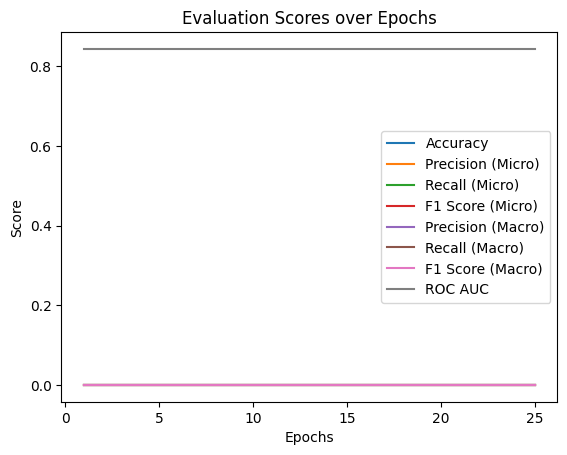

In [44]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data from the Excel file
data = pd.read_excel('/content/drive/MyDrive/DATA/balanced.xlsx')
comments = data['Preprocessed Text'].tolist()
labels = data[['Positive', 'Neutral', 'Negative']].values.tolist()

# Define the number of epochs
num_epochs = 25

# Create lists to store the scores for each epoch
accuracy_scores = []
precision_micro_scores = []
recall_micro_scores = []
f1_score_micro_scores = []
precision_macro_scores = []
recall_macro_scores = []
f1_score_macro_scores = []
roc_auc_scores = []

# Split the data into training and validation sets
train_comments, val_comments, train_labels, val_labels = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Load the pre-trained tokenizer and encode the comments
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_encodings = tokenizer(train_comments, truncation=True, padding=True)
val_encodings = tokenizer(val_comments, truncation=True, padding=True)

# Convert the labels to tensors
train_labels = torch.tensor(train_labels, dtype=torch.float)
val_labels = torch.tensor(val_labels, dtype=torch.float)

# Create a PyTorch dataset
class CommentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CommentDataset(train_encodings, train_labels)
val_dataset = CommentDataset(val_encodings, val_labels)

# Define the RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Define the optimizer and the learning rate scheduler
optimizer = AdamW(model.parameters(), lr=1e-1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

# Define the loss function
loss_fn = nn.MSELoss()

# Train the model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    scheduler.step()
    print(f"Epoch {epoch + 1} - Loss: {total_loss / len(train_loader)}")

    accuracy_scores.append(accuracy)
    precision_micro_scores.append(precision_micro)
    recall_micro_scores.append(recall_micro)
    f1_score_micro_scores.append(f1_score_micro)
    precision_macro_scores.append(precision_macro)
    recall_macro_scores.append(recall_macro)
    f1_score_macro_scores.append(f1_score_macro)
    roc_auc_scores.append(roc_auc)

    # Print the scores for the current epoch
    print(f"Epoch {epoch + 1}:")
    print(f"Accuracy: {accuracy}")
    print(f"Micro-average Precision: {precision_micro}")
    print(f"Micro-average Recall: {recall_micro}")
    print(f"Micro-average F1 score: {f1_score_micro}")
    print(f"Macro-average Precision: {precision_macro}")
    print(f"Macro-average Recall: {recall_macro}")
    print(f"Macro-average F1 score: {f1_score_macro}")
    print(f"ROC AUC score: {roc_auc}")
    print()

# Evaluate the model
model.eval()
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16)

val_preds = []
val_true_labels = []

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = logits.detach().cpu().numpy()
    val_preds.extend(preds)
    val_true_labels.extend(labels.cpu().numpy())

val_preds = np.array(val_preds)
val_true_labels = np.array(val_true_labels)

# Apply a threshold to convert logits to binary predictions
threshold = 0.5
val_preds_binary = (val_preds > threshold).astype(int)

# Calculate mean squared error (MSE) for multi-label classification
mse = mean_squared_error(val_true_labels, val_preds)

print(f"Mean Squared Error (MSE): {mse}")

# Plot the scores over the number of epochs
epochs = range(1, num_epochs + 1)

plt.plot(epochs, accuracy_scores, label='Accuracy')
plt.plot(epochs, precision_micro_scores, label='Precision (Micro)')
plt.plot(epochs, recall_micro_scores, label='Recall (Micro)')
plt.plot(epochs, f1_score_micro_scores, label='F1 Score (Micro)')
plt.plot(epochs, precision_macro_scores, label='Precision (Macro)')
plt.plot(epochs, recall_macro_scores, label='Recall (Macro)')
plt.plot(epochs, f1_score_macro_scores, label='F1 Score (Macro)')
plt.plot(epochs, roc_auc_scores, label='ROC AUC')

plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Evaluation Scores over Epochs')
plt.legend()
plt.show()


#Heat Map

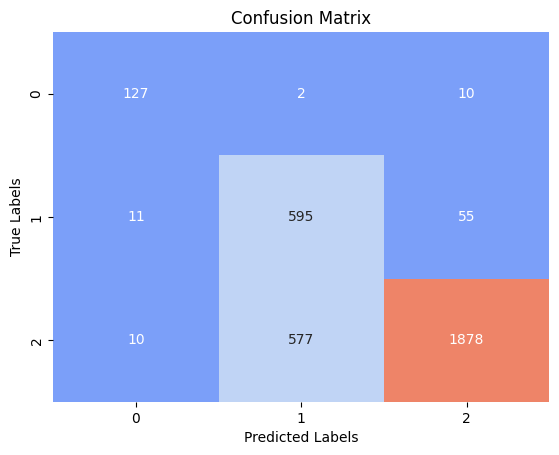

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert multilabel indicators to single labels
val_true_labels_single = np.argmax(val_true_labels, axis=1)
val_preds_single = np.argmax(val_preds_binary, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(val_true_labels_single, val_preds_single)

# Define the labels for the heatmap
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

# Create a custom color map
cmap = sns.color_palette('coolwarm', 4)


# Create a heatmap plot
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
